In [3]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

%matplotlib inline

In [4]:
kannada_train = pd.read_csv('train.csv')
del kannada_train['label']

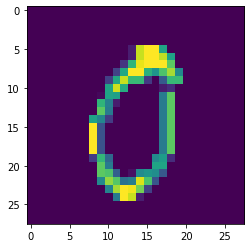

In [5]:
image = kannada_train.iloc[0].values.reshape(28,28)
plt.imshow(image)
plt.show()

In [36]:
class CNN(torch.nn.Module):
    def __init__(self,input_channel, output_channel, padding=0):
        super(CNN, self).__init__()
        self.conv = torch.nn.Conv2d(input_channel,output_channel, kernel_size=3, stride=1, padding=padding)
        self.pool = torch.nn.MaxPool2d(kernel_size=3, stride=1, padding=0)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.pool(x)
        return x
    
class encoder(torch.nn.Module):
    def __init__(self):
        super(encoder, self).__init__()
        self.cnn1 = CNN(1,16)
        self.cnn2 = CNN(16,32)
        self.cnn3 = CNN(32,64)
        
    def forward(self, x):
        x = self.cnn1(x)
        x = self.cnn2(x)
        x = self.cnn3(x)
        return x
    
class decoder(torch.nn.Module):
    def __init__(self):
        super(decoder, self).__init__()
        self.cnn1 = CNN(64,32,padding = 4)
        self.cnn2 = CNN(32,8,padding = 4)
        self.cnn3 = CNN(8,1,padding = 4)
        
    def forward(self, x):
        x = self.cnn1(x)
        x = self.cnn2(x)
        x = self.cnn3(x)
        return x
    
class AE(torch.nn.Module):
    def __init__(self):
        super(AE,self).__init__()
        self.encoder = encoder()
        self.decoder = decoder()
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [37]:
model = AE()
model(X[2].view(-1,1,28,28).float()).shape

torch.Size([1, 1, 28, 28])

In [7]:
X = torch.tensor(kannada_train.values.reshape((-1,28,28)))

In [57]:
def train(lossfunction, x, y, model, optimiser):
    optimiser.zero_grad()
    outputs = model(x)
    loss = lossfunction(outputs.float(), y.float())
    loss.backward()
    optimiser.step()

    return outputs,loss
    

In [59]:
from torch.utils.data import DataLoader

In [70]:
data = DataLoader(X.view(-1,1,28,28).float(),batch_size = 1028)

In [72]:
import gc

gc.collect()
loss_function = nn.MSELoss()

model = AE().to(device)
optimiser = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_array = []
epoch = 3
for _ in range(epoch):
    print('epoch',_)
    index = np.arange(X.shape[0])
    for x in data:
        _, loss = train(loss_function, x,x, model, optimiser)
        loss_array.append(loss.item())

        print(loss.item())

epoch 0
4529.2021484375
4269.96044921875
3879.150146484375


KeyboardInterrupt: 

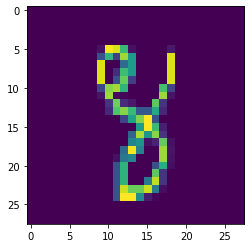

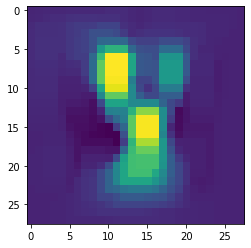

In [56]:
index = 124

plt.imshow(X[index])
plt.show()

plt.imshow(model(X[index].view(-1,1,28,28).float()).detach().numpy().reshape(28,28))
plt.show()